Things to check:
1. $\chi^2$ histogram
2. Error histogram
3. Residuals histogram for individual runs
4. Look at longer run

In [17]:
%load_ext autoreload
%autoreload
import sys, os
import numpy as np
import scipy.optimize as optimize
import scipy.fftpack as fft
import scipy.linalg as linalg
from scipy.stats import linregress

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from fitFunctions import *
from partialfitting import *
from tqdm import *
from fitphases import *
from chi2 import *
from corr2Pi import *

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 15

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
for i in range(100):
    times = np.arange( 1, 500*1000, 1 )/1000
    sig = 0.39770392*np.sin(2*np.pi*1.554*times)
    sig = sig + np.random.normal(0, 1e-6, size=len(sig))
    np.savetxt('/home/jean/RomalisResearch/pulsed_fitter_current/OneFreq/FakeData/fakedata'+str(i)+".txt", sig)

In [20]:
#dirName = "/home/jean/RomalisResearch/ncrescini/18-10-30 1/" # Directory with data
dirName = "/home/jean/RomalisResearch/pulsed_fitter_current/OneFreq/FakeData/" # Directory with data
files = [f for f in os.listdir(dirName) if f.endswith('.txt')]
gHe = 20378.9
gNe = 2*np.pi*336.1
gRatio = gHe/gNe

ks1 = 0 # First file index
ks2 = 99 # Last file index
n_ave = 1 # Number of points to average over

dt = 1e-3*n_ave
Fs = 1/dt
D1Start = 10 # Start of first detection (currently only uses this)
D1EndTimes = [60] # End of first detection (currently only uses this)
D2Start = 200 # Start of second detection (currently doesn't use this)
D2EndTimes = [240] # End of second detection (currently doesn't use this)
absSigma = True

delta_t = 2/1.56 # Time length of a subsectino

In [21]:
phi_fit_arr = np.empty((ks2+1-ks1, 2))
phi_fiterr_arr = np.empty((ks2+1-ks1, 2))
chi2_arr = np.empty(ks2+1-ks1)

phi_arr_all = []
phi_fitresults_arr = []
phi_fitresults_arr = []
phi_err_all = []

for k_ind in range(ks1, ks2+1):
    print(k_ind)
    k = k_ind - ks1 # file number
    paraOut_arr, errtout_arr, dataPar_x, dataPar_y, datafit = initialfitting(k_ind, k, n_ave, dirName, files, dt, Fs, D1Start, D1EndTimes, D2Start, D2EndTimes, delta_t)
    phi_err = errtout_arr[:,2];
    times = np.mean(dataPar_x, axis=1)
    phi_arr, fit_freq, fit_err = correctPhases(times, paraOut_arr, errtout_arr)
    phi_fit_results, phi_fit_arr[k], phi_fiterr_arr[k], chi2_arr[k] = fitPhases(times, phi_arr, phi_err)

    phi_arr_all.append(phi_arr)
    phi_err_all.append(phi_err)
    phi_fitresults_arr.append(phi_fit_results)

phi_fitresults_arr = np.array(phi_fitresults_arr)
phi_arr_all = np.array(phi_arr_all)
phi_err_all = np.array(phi_err_all)

0


/home/jean/RomalisResearch/pulsed_fitter_current/OneFreq/fitFunctions.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  s_sq = np.sum( ((fitval-y)/sigma)**2 )/(len(x) - 2)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


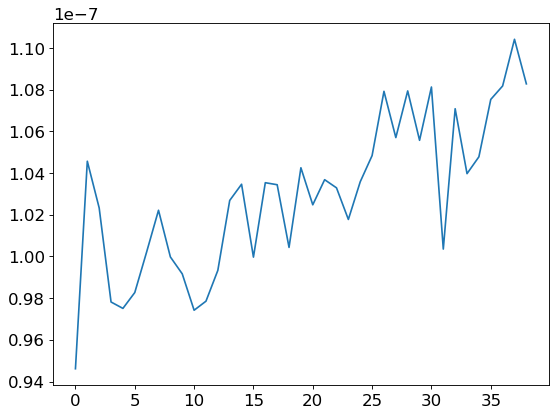

In [22]:
#plt.plot(dataPar_x.flatten(), dataPar_y.flatten()-datafit)
plt.plot(phi_err)

[0.68931758 0.65413951 1.11518726 1.20877779 0.56039538 1.00685378
 0.43531821 1.02308802 1.14143803 1.24480204 0.70433429 0.79055691
 0.72366214 1.27142698 0.80919623 0.8570467  1.25674966 1.19181844
 0.91253698 1.085146   1.18555697 0.82895527 0.71122888 0.77156524
 1.25079073 1.30858313 1.03086625 1.25549966 1.10000482 1.02124428
 1.18072286 1.05026429 1.05463428 1.29050936 1.19530984 0.77949758
 1.28889388 0.9003877  1.14299419 0.74756978 0.6398424  0.51996566
 0.81347605 0.83356162 1.00350794 1.03586896 0.80602757 0.96718487
 0.80197812 1.27920151 0.86757284 0.82573455 0.72491991 1.16064296
 0.83458923 0.91619454 1.1107544  0.84695413 1.01939123 0.9518189
 1.00876383 1.00403153 0.85705105 1.16177005 0.86082689 0.97492577
 1.39915551 1.1215494  0.94231542 0.94706293 0.81571256 1.02315335
 1.37782142 1.35608435 0.98543685 1.06228318 0.73969014 1.09413441
 1.01332037 1.01858255 1.06550737 0.76994957 0.95107027 1.05587185
 0.92942046 0.91422572 0.942801   0.94629523 0.98217228 0.83423

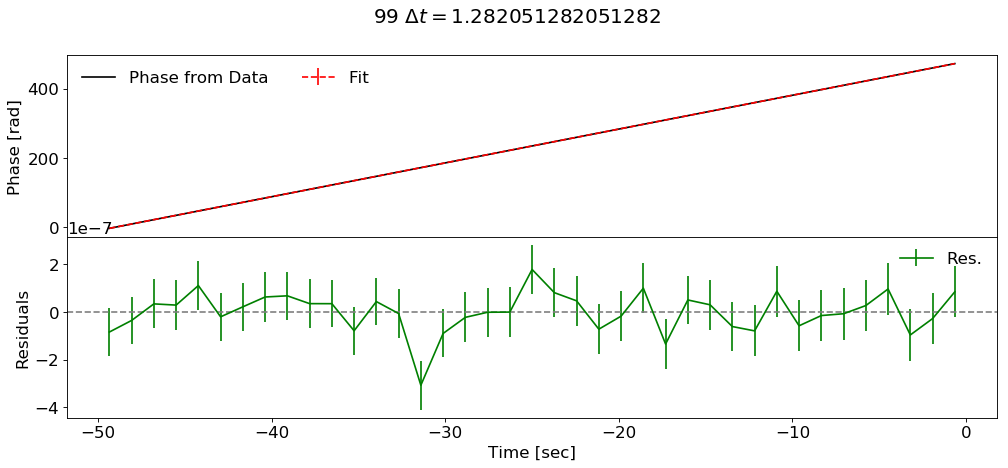

In [23]:
i=0
mpl.rcParams['figure.figsize'] = [15.0, 6.0]
f, ax_arr = plt.subplots(2, 1)
f.suptitle(str(k_ind)+' $\Delta t = '+str(delta_t)+"$")
ax_arr[0].plot( times, phi_arr_all[i], c="black", label="Phase from Data")
ax_arr[0].errorbar( times, phi_fitresults_arr[i], (phi_fiterr_arr[i][1]+phi_fiterr_arr[i][0]*times), c="red", ls="--", label="Fit")
ax_arr[1].errorbar( times, (phi_arr_all[i] - phi_fitresults_arr[i]), phi_err_all[i], c="green", label="Res.")
ax_arr[1].axhline(0, ls="--", c="grey")
ax_arr[0].legend(frameon=False, ncol=2 )
ax_arr[1].legend(frameon=False, ncol=2 )
ax_arr[1].set_xlabel("Time [sec]")
ax_arr[0].set_ylabel("Phase [rad]")
ax_arr[1].set_ylabel("Residuals")
ax_arr
f.subplots_adjust(hspace=0)
print(chi2_arr)

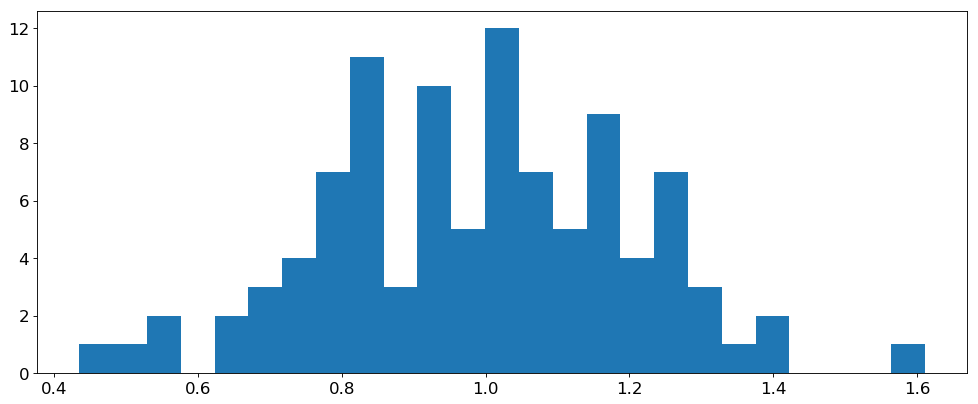

In [26]:
plt.hist(chi2_arr, bins=25);